k means clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/Clustering.xlsx')
data.head()

,Variable_1,Variable_2
0,12,30
1,20,36
2,28,30
3,18,52
4,29,54


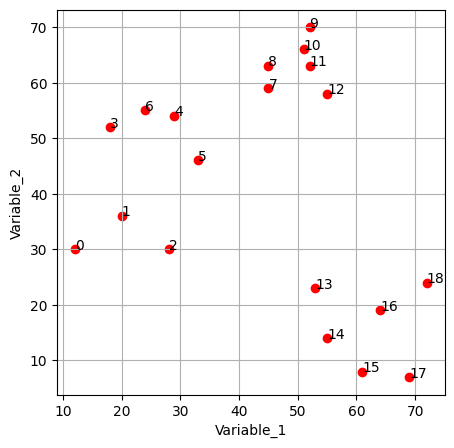

In [ ]:
fig = plt.figure(figsize = (5,5))
x = data["Variable_1"]
y = data["Variable_2"]
n = range(0,19)
plt.grid()
plt.scatter(x, y, marker = 'o', c = 'red' )
plt.xlabel('Variable_1')
plt.ylabel('Variable_2')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

In [ ]:
from sklearn.cluster import KMeans
individual_clustering_score = []
for i in range(1,5):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    individual_clustering_score.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
individual_clustering_score

[13773.57894736842, 5352.166666666666, 1794.1428571428573, 1063.75]

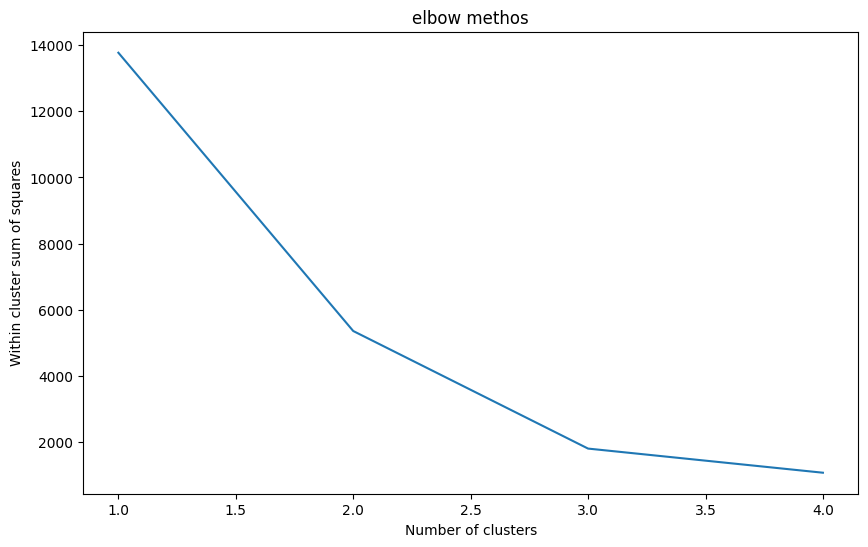

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,5), individual_clustering_score)
plt.title("elbow methos")
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squares")
plt.show()

In [ ]:
labels = kmeans.predict(data)
labels

array([3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
kmeans.labels_

array([3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
# cluster centers
centroids

array([[62.33333333, 15.83333333],
       [26.        , 51.75      ],
       [50.        , 63.16666667],
       [20.        , 32.        ]])

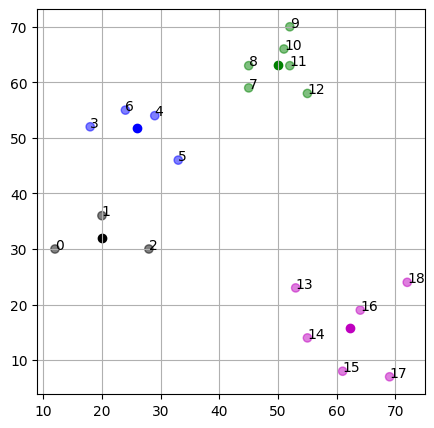

In [ ]:
fig = plt.figure(figsize = (5,5))
# dictionary- map numbers to colors
colmap = {1:'m', 2:'b', 3:'g', 4:'k'}
# map will assign colors to labels
colors = map(lambda x: colmap[x+1], labels)

colors1=list(colors)
plt.scatter(x, y, color= colors1, alpha = 0.5 )
# plotting the centroids wrt color
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color = colmap[idx+1])
# labeling the points as 0,1,2,....18
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
plt.grid()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(data, labels)

0.6179376814567372

In [ ]:
colors1

['k',
 'k',
 'k',
 'b',
 'b',
 'b',
 'b',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm']

Agglomerative Clustering on Iris dataset


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Import iris data
iris = datasets.load_iris()

iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['flower_type'] = iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


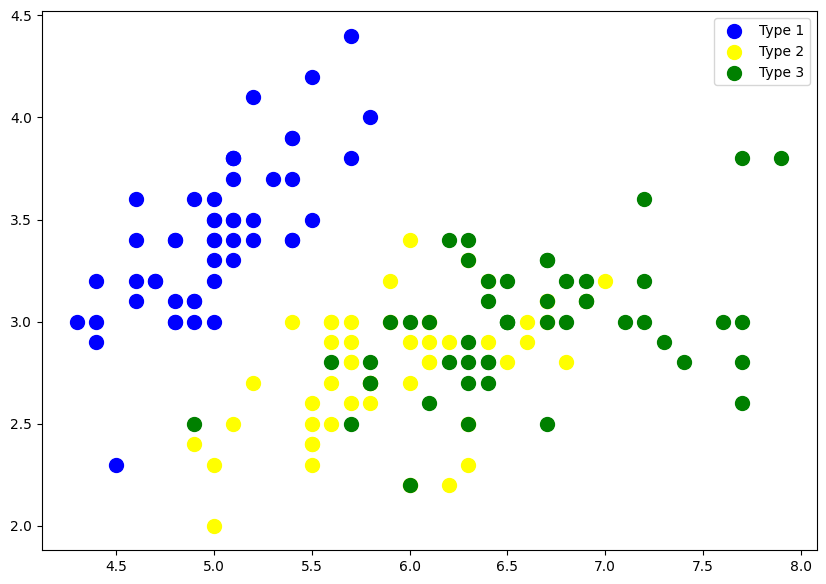

In [2]:
iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
iris_Y = iris_data.iloc[:,4].values

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], s=100, c='blue', label='Type 1')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], s=100, c='yellow', label='Type 2')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], s=100, c='green', label='Type 3')
plt.legend()
plt.show()

Text(0, 0.5, 'Euclidean distance')

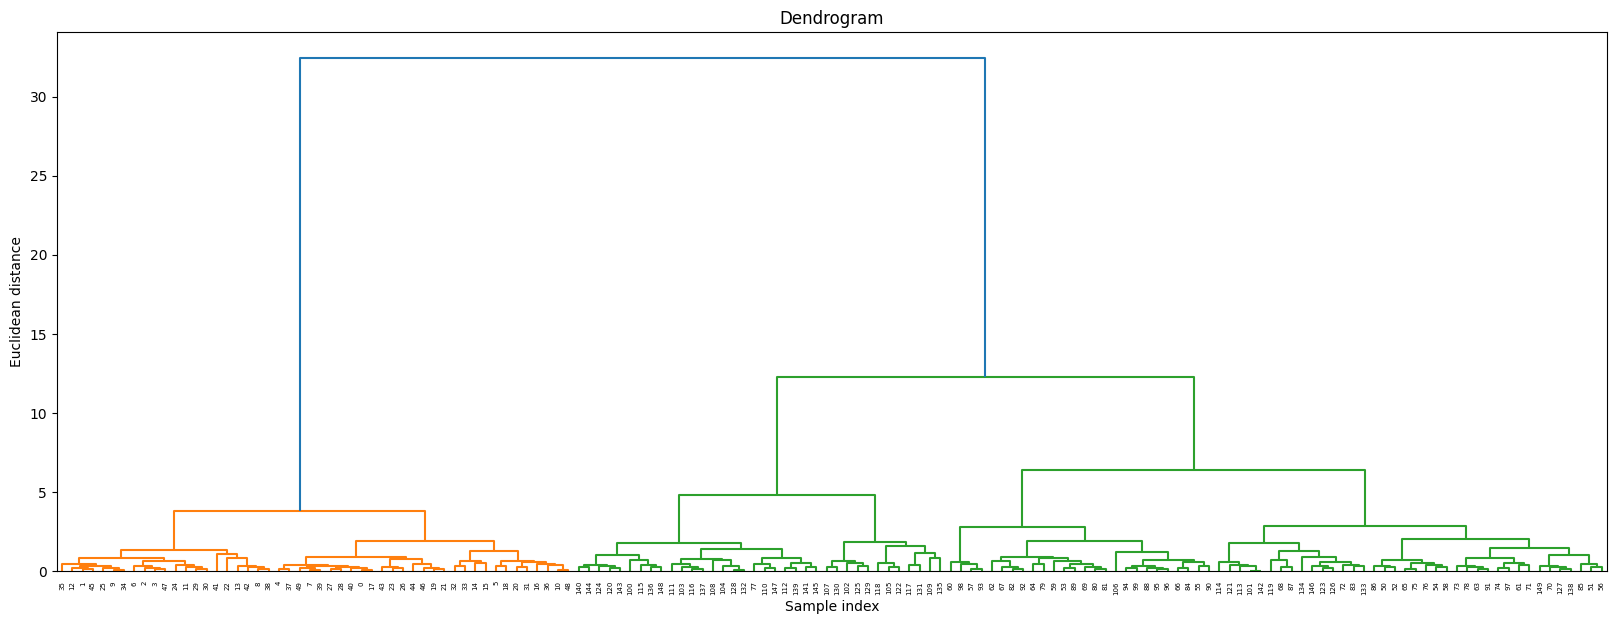

In [3]:
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(20, 7))
plt.title("Dendrograms")

# Create dendrogram
sc.dendrogram(sc.linkage(iris_X, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

In [4]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
n_clusters=3, affinity='euclidean', linkage='ward')

cluster.fit(iris_X)
labels = cluster.labels_
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

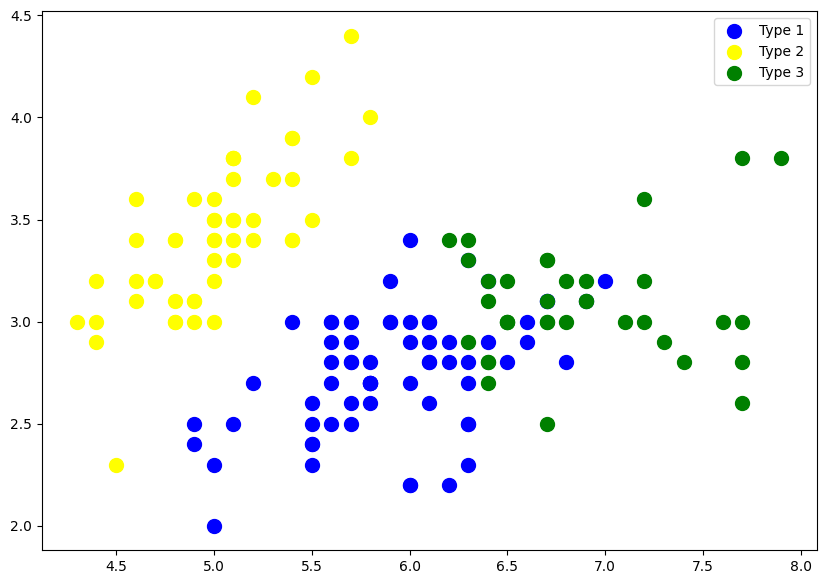

In [5]:
plt.figure(figsize=(10, 7))
plt.scatter(iris_X[labels == 0, 0], iris_X[labels == 0, 1], s = 100, c = 'blue', label = 'Type 1')
plt.scatter(iris_X[labels == 1, 0], iris_X[labels == 1, 1], s = 100, c = 'yellow', label = 'Type 2')
plt.scatter(iris_X[labels == 2, 0], iris_X[labels == 2, 1], s = 100, c = 'green', label = 'Type 3')
plt.legend()
plt.show()

Agglomerative Clustering on synthetic dataset

In [6]:
import numpy as np

X = np.array([[5,3],
[10,15],
[15,12],
[24,10],
[30,30],
[85,70],
[71,80],
[60,78],
[70,55],
[80,91],])

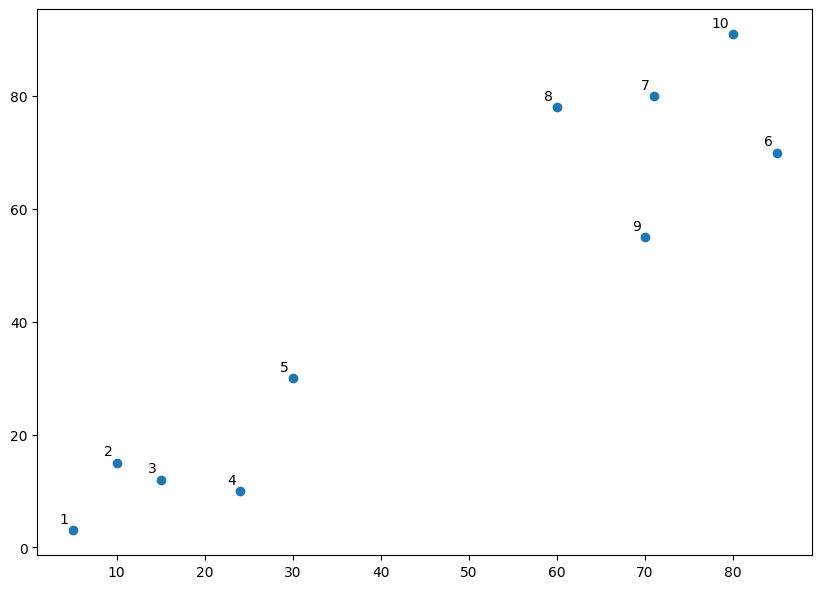

In [7]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(label,
xy=(x, y), xytext=(-3, 3),
textcoords='offset points', ha='right', va='bottom')
plt.show()

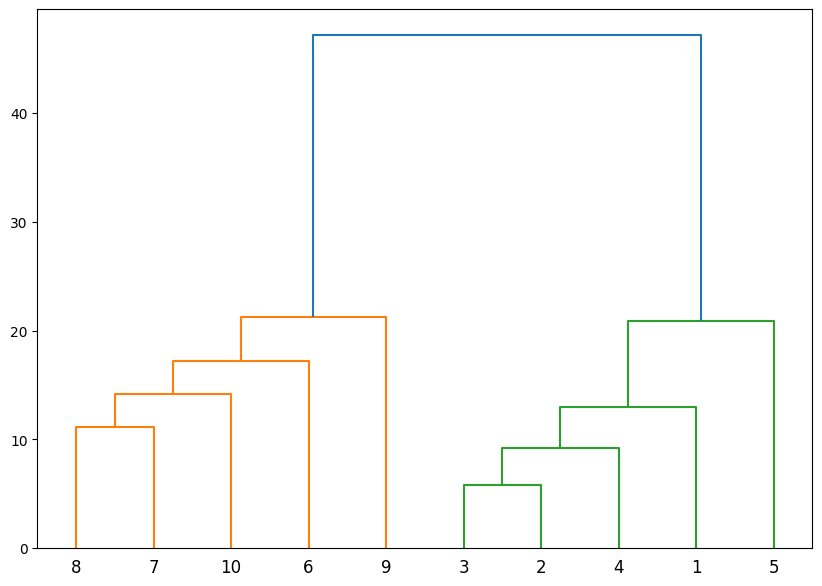

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
orientation='top',
labels=labelList,
distance_sort='descending',
show_leaf_counts=True)
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [10]:
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


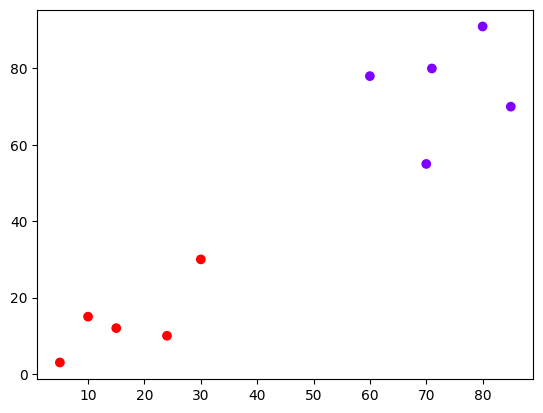

In [11]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')